In [1]:
import draw2Svg as dw

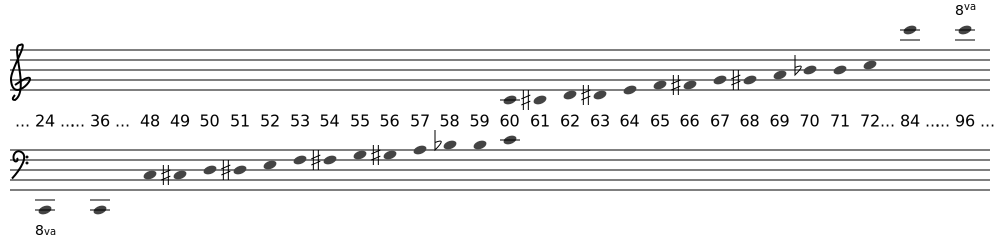

In [3]:
w,h = 1000,250
d = dw.Drawing(w,h)

def note(x=10,y=10,y_space=10,**args):
    """note with xy as center
    for color: fill='gray' or fill='#555'"""
    r = y_space/2
    p = dw.Path(**args)
    p1 = x-r*1.2,y+r*.6
    p2 = x+r*1.2,y-r*.6
    p.M(*p1)
    p.C(x-r*1.7,y-r*.3, x+r*.3,y-r*1.4, *p2)
    p.C(x+r*1.7,y+r*.3, x-r*.3,y+r*1.4, *p1)
    d.append(p)

def sharp(x_note=10,y_note=10,y_space=10,color='black',sw=1,x_offset_mult=2/3):
    """sharp sign before a note
    x_note and y_note are the middle of the note
    x_offset_mult: x offset between sharp and note as ratio of y_space"""
    width = y_space*1/2
    x_offset = y_space*x_offset_mult
    ybot = y_note+y_space
    ybot1 = y_note+y_space*1/2 #left
    ybot2 = y_note+y_space*1/9 #right
    ytop = y_note-y_space
    ytop2 = y_note-y_space*1/2 #left
    ytop1 = y_note-y_space*1/9 #right
    x1 = x_note-x_offset-width-y_space/2
    x2 = x_note-x_offset-y_space/2
    xmin = x1-y_space*1/5
    xmax = x2+y_space*1/5
    g = dw.Group(stroke=color,stroke_width=sw)
    g.append(dw.Line(x1,ybot,x1,ytop))
    g.append(dw.Line(x2,ybot,x2,ytop))
    g.append(dw.Line(xmin,ybot1,xmax,ybot2))
    g.append(dw.Line(xmin,ytop1,xmax,ytop2))
    d.append(g)

def bflat(x_note=10,y_note=10,y_space=10,color='black',sw=1,x_offset_mult=1):
    """b flat sign before a note
    x_note and y_note are the middle of the note
    x_offset_mult: x offset between sharp and note as ratio of y_space"""
    width = y_space*1/2
    x_offset = y_space*x_offset_mult
    x_left = x_note-x_offset-width
    y_top = y_note-y_space*1.5
    y_bot = y_note+y_space*0.5
    y_end = y_note-y_space*1/4
    p = dw.Path(fill='none',stroke=color,stroke_width=sw)
    p.M(x_left,y_top)
    p.V(y_bot)
    p.Q(x_note-x_offset*1/4,y_note-y_space*3/4 ,x_left,y_end)
    d.append(p)

def ledger(x=10,y=10,num=1,y_space=10,leng=20,sw=1,color='black'):
    """draws num ledgers
    x,y is the center of the first one, the others are below"""
    for i in range(num):
        d.append(dw.Line(x-leng/2,y,x+leng/2,y,stroke=color,stroke_width=sw))
        y += y_space
    
def stave(x=10,y=10,len=200,y_space=10,color='black',sw=1,numlines=5):
    """draws a stave.  x,y are top left"""
    for i in range(numlines):
        d.append(dw.Line(x,y+i*y_space,x+len,y+i*y_space,stroke=color,stroke_width=sw))

def violinClef(x=10,y=10,linspace=10,color='black',sw=2):
    """draws a violin clef.  x,y are top left of the stave"""
    p1 = x+linspace/2,y+linspace*3.5
    c1a = x+linspace*4,y+linspace
    c1b = x+linspace/3, y+linspace*6
    p2 = x+linspace/10,y+linspace*3
    c2a = x,y+linspace*2
    c2b = x+linspace*2,y-linspace
    p3 = x+linspace,y-linspace/2
    c3a = x,y-linspace/2
    c3b = x+linspace*2, y+linspace*4
    p4 = x+linspace/2,y+linspace*5
    c4a = x, y+linspace*5
    c4b = x+linspace/2, y+linspace*4.5
    p5 = x+linspace/2,y+linspace*4.5
    p = dw.Path(stroke=color,stroke_width=sw,fill='none')
    p.M(*p1)
    p.C(*c1a, *c1b, *p2)
    p.C(*c2a, *c2b, *p3)
    p.C(*c3a, *c3b, *p4)
    p.C(*c4a, *c4b, *p5)
    d.append(p)

def bassClef(x=10,y=10,linspace=10,color='black',sw=2,r=1):
    """draws a bass clef.  x,y are top left of the stave
    sw = stroke width, r = radius for two points"""
    p1 = x+linspace*.7,y+linspace*.8
    c1a = x+linspace*.9,y+linspace*1.1
    c1b = x+linspace*.5, y+linspace*1.3
    p2 = x+linspace*.4,y+linspace
    c2a = x+linspace*.2,y+linspace/2
    c2b = x+linspace*.6,y
    p3 = x+linspace*1,y+linspace/7
    c3a = x+linspace*2,y+linspace/2
    c3b = x+linspace, y+linspace*2
    p4 = x+linspace/5,y+linspace*3-linspace/7
    p = dw.Path(stroke=color,stroke_width=sw,fill='none')
    p.M(*p1)
    p.C(*c1a, *c1b, *p2)
    p.C(*c2a, *c2b, *p3)
    p.C(*c3a, *c3b, *p4)
    d.append(p)
    d.append(dw.Circle(x+linspace*1.7,y+linspace-r*3,r,stroke=color))
    d.append(dw.Circle(x+linspace*1.7,y+linspace+r*3,r,stroke=color))

# staves 
st1y = 50
st2y = 150
startx = 10
stave(startx,st1y,w-20)
stave(startx,st2y,w-20)
violinClef(startx,st1y)
bassClef(startx,st2y)

# text middle
size = 16
x = 150
x_shift = 30
y = st2y-30
x1 = 45
x2 = 100
x3 = 910
x4 = 965
for num in range(48,73):
    d.append(dw.Text('%d'%num,size,x,y,text_anchor='middle',valign='middle'))
    x += x_shift
d.append(dw.Text('... 24 ...',size,x1,y,text_anchor='middle',valign='middle'))
d.append(dw.Text('... 36 ...',size,x2,y,text_anchor='middle',valign='middle'))
d.append(dw.Text('... 84 ...',size,x3,y,text_anchor='middle',valign='middle'))
d.append(dw.Text('... 96 ...',size,x4,y,text_anchor='middle',valign='middle'))
    
# notes and accidentals
c = '#444'
xstart = 150
ystart = st2y + 25
for i,j in zip([0,1,0,1,1,0,1,0,1,1,0,1,1,1],[0,1,0,1,0,0,1,0,1,0,-1,0,0]):
    note(xstart,ystart,fill=c)
    if j==1: sharp(xstart,ystart)
    elif j==-1: bflat(xstart,ystart)
    xstart += x_shift
    ystart -= 5*i
xstart = 510
ystart = st1y + 50
for i,j in zip([0,1,0,1,1,0,1,0,1,1,0,1,1,1],[0,1,0,1,0,0,1,0,1,0,-1,0,0]):
    note(xstart,ystart,fill=c)
    if j==1: sharp(xstart,ystart)
    elif j==-1: bflat(xstart,ystart)
    xstart += x_shift
    ystart -= 5*i
note(x1,st2y+60,fill=c)
note(x2,st2y+60,fill=c)
note(x3,st1y-20,fill=c)
note(x4,st1y-20,fill=c)

# ledgers
ledger(x1,st2y+50,2)
ledger(x2,st2y+50,2)
ledger(x3,st1y-20,2)
ledger(x4,st1y-20,2)
ledger(510,st1y+50)
ledger(510,st2y-10)

# ottava
d.append(dw.Text('8',14,x1-2,st2y+85,font_style='italic',text_anchor='end'))
d.append(dw.Text('va',10,x1-1,st2y+85,font_style='italic',text_anchor='start'))
d.append(dw.Text('8',14,x4-2,st1y-35,font_style='italic',text_anchor='end'))
d.append(dw.Text('va',10,x4-1,st1y-40,font_style='italic',text_anchor='start'))

d.savePng('../../images/01-GS-05-a.png')
d